In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv("C:/Users/umaac/Downloads/iris data.csv")
df

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [29]:
dict_species={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2,}
df.replace({'Species':dict_species},inplace=True)
df

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [30]:
df=df.drop(['id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
x=df.drop(['Species'],axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['squared_error'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [35]:
RFC_reg.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 75}

In [36]:
reg=RandomForestRegressor(n_estimators=125,criterion='squared_error',max_depth=5)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=125)

In [37]:
y_pred=reg.predict(x_test)
y_pred

array([0.976, 1.552, 2.   , 1.   , 2.   , 0.992, 2.   , 0.992, 0.   ,
       2.   , 1.   , 0.   , 0.   , 0.   , 0.976, 1.848, 0.   , 0.   ,
       0.   , 0.992, 0.   , 0.992, 2.   , 0.   , 1.   , 1.984, 0.   ,
       1.568, 2.   , 1.   , 0.976, 2.   , 0.976, 0.   , 0.976, 2.   ,
       0.   , 0.   , 0.976, 1.952, 0.   , 2.   , 0.   , 0.   , 1.568,
       0.976, 2.   , 1.552, 1.552, 2.   , 0.976, 0.   , 0.   , 1.552,
       2.   , 0.   , 0.   , 0.   , 1.4  , 2.   , 0.   , 2.   , 2.   ,
       0.   , 1.   , 1.   , 1.568, 1.   , 2.   , 0.   , 2.   , 1.   ,
       2.   , 0.992, 0.976, 1.   , 0.   , 1.   , 0.976, 0.   , 0.992,
       2.   , 2.   , 0.   , 0.976, 2.   , 1.552, 0.   , 2.   , 0.   ,
       1.4  , 2.   , 2.   , 0.992, 2.   , 1.   , 1.   , 1.84 , 2.   ,
       0.   , 1.   , 1.368, 0.024, 1.   , 2.   ])

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9682124324324324

In [38]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,81,1,0.976,0
1,133,2,1.552,1
2,137,2,2.000,2
3,75,1,1.000,3
4,109,2,2.000,4
5,96,1,0.992,5
6,105,2,2.000,6
7,66,1,0.992,7
8,0,0,0.000,8
9,122,2,2.000,9


[]

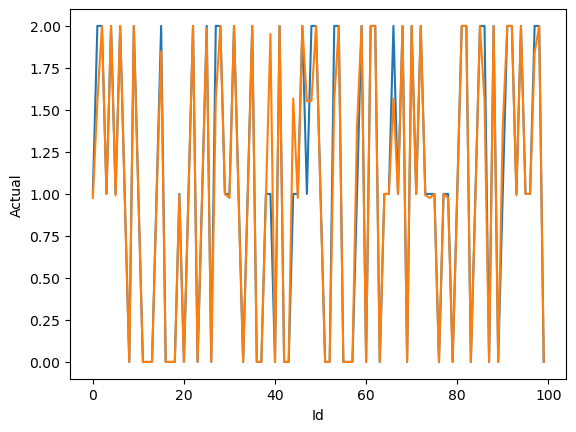

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()